**Libs used in this project:**

In [1]:
!pip install easyocr
!pip install imutils
!pip install opencv-contrib-python
!pip install numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.9/813.9 kB 39.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 13.9 MB/s eta 0:00:00


In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

**Image processing start here:**

Image is going to be taken with CV and converted to mono color and then from BRG to RGB

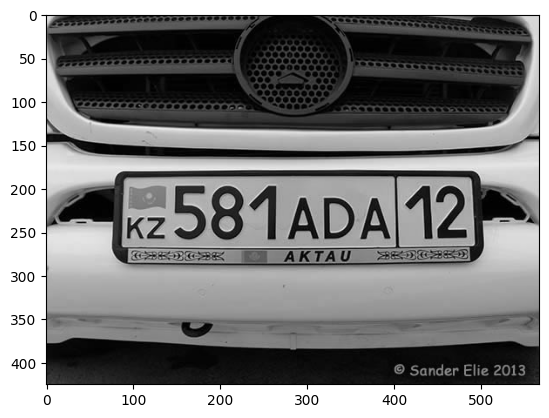

In [47]:
img = cv2.imread('963.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

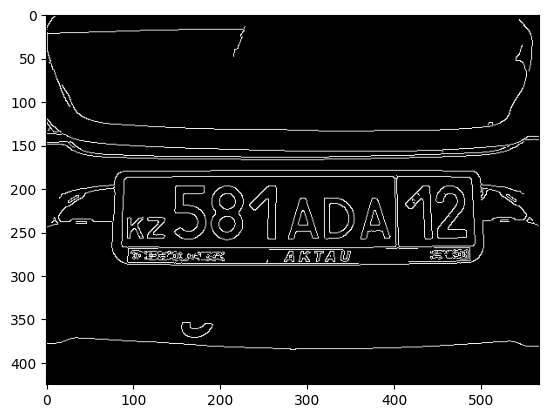

In [48]:
bfilter = cv2.bilateralFilter(gray, 35, 75, 75) #Noise reduction
edged = cv2.Canny(bfilter, 35, 270) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

Shape detection to find number plate

In [49]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [50]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [51]:
location

array([[[ 89, 191]],

       [[397, 186]],

       [[402, 264]],

       [[ 88, 267]]], dtype=int32)

In [52]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

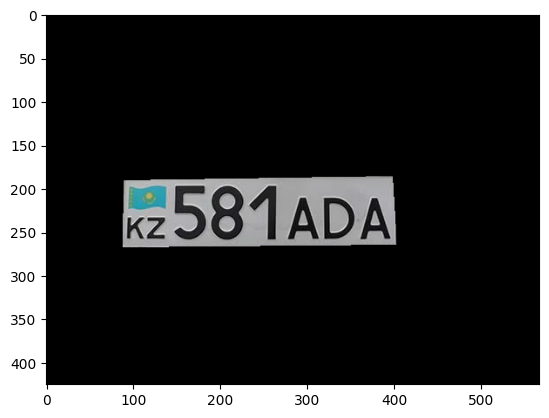

In [53]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

taking plate as image

In [54]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

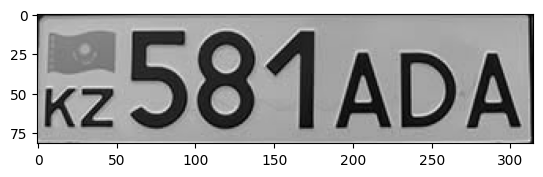

In [55]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

Will use easyOCR to read and output number for further usage!!!

In [56]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)

In [57]:
result

[([[1, 41], [55, 41], [55, 79], [1, 79]], 'KZ', 0.9151701665481321),
 ([[49, 0], [315, 0], [315, 82], [49, 82]], '581ADA', 0.9024582179012529)]

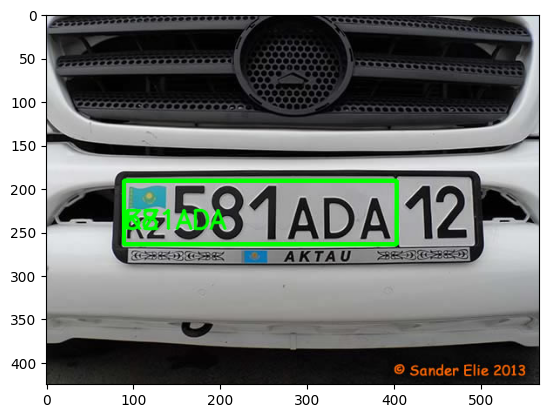

In [60]:
text = result[-1][1]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

In [61]:
text

'581ADA'